In [ ]:
#PASS
#https://www.gutenberg.org/files/236/236-0.txt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [ ]:
#LOAD TEXT
#Save notepad as UTF-8 (select from dropdown during saving)
#filename = "files/the_jungle_book.txt"
from google.colab import drive
drive.mount('/content/drive')
filename = open('/content/drive/My Drive/Colab Notebooks/NLP/NextWordPrediction/the_jungle_book.txt', "r", encoding = "utf8").read()

# lines = []

# for i in filename:
#     lines.append(i)
    

# raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = filename
raw_text = raw_text.lower()
print(raw_text[0:1000])

Mounted at /content/drive
the project gutenberg ebook of the jungle book, by rudyard kipling

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: the jungle book

author: rudyard kipling

release date: january 16, 2006 [ebook #236]
last updated: october 6, 2016

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook the jungle book ***




produced by an anonymous volunteer and david widger





the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darzee’s chant
     toomai of the elephants
     shiv and the grasshopper
     her majesty’

In [ ]:
#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())


In [ ]:
#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character

#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

# summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  292869
Total Vocab:  50


In [ ]:
# char_to_int

In [ ]:
# int_to_char

In [ ]:
len(raw_text)

292869

In [ ]:
########################
#Now that we have characters we can create input/output sequences for training
#Remember that for LSTM input and output can be sequences... hence the term seq2seq


seq_length = 60  #Length of each input sequence
step = 10   #Instead of moving 1 letter at a time, try skipping a few. 
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

#Have a look at sentences and next_chars to see the continuity...

Number of sequences: 29281


In [ ]:
sentences[15]

'tions whatsoever.  you may copy it, give it away or\nre-use i'

In [ ]:
next_chars[15]

't'

In [ ]:
############################

#Just like time series, X is the sequence / sentence and y is the next value
#that comes after the sentence... 

# reshape input to be [samples, time steps, features]

#time steps = sequence length
#features = numbers of characters in our vocab (n_vocab)
#Vectorize all sentences: there are n_patterns sentences.
#For each sentence we have n_vocab characters available for seq_length
#Vectorization returns a vector for all sentences indicating the presence or absence 
#of a character. 

x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


(29281, 60, 50)
(29281, 50)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False]
 [False False False False False False F

In [ ]:
##################################################
#Basic model with one LSTM
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,run_eagerly=None)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 50)                6450      
                                                                 
Total params: 98,098
Trainable params: 98,098
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

######################################
# Deeper model woth 2 LSTM
#To stack LSTM layers, we need to change the configuration of the prior 
#LSTM layer to output a 3D array as input for the subsequent layer.
#We can do this by setting the return_sequences argument on the layer to True 
#(defaults to False). This will return one output for each input time step and provide a 3D array.
#Below is the same example as above with return_sequences=True.

#model = Sequential()
#model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#optimizer = RMSprop(lr=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#model.summary()

In [ ]:
###############


# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


In [ ]:
# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
222/229 [============================>.] - ETA: 0s - loss: 2.5187
Epoch 1: loss improved from inf to 2.51072, saving model to saved_weights/saved_weights-01-2.5107.hdf5
229/229 [==============================] - 8s 8ms/step - loss: 2.5107
Epoch 2/50
223/229 [============================>.] - ETA: 0s - loss: 2.0535
Epoch 2: loss improved from 2.51072 to 2.05112, saving model to saved_weights/saved_weights-02-2.0511.hdf5
229/229 [==============================] - 2s 7ms/step - loss: 2.0511
Epoch 3/50
224/229 [============================>.] - ETA: 0s - loss: 1.8578
Epoch 3: loss improved from 2.05112 to 1.85670, saving model to saved_weights/saved_weights-03-1.8567.hdf5
229/229 [==============================] - 2s 7ms/step - loss: 1.8567
Epoch 4/50
229/229 [==============================] - ETA: 0s - loss: 1.7093
Epoch 4: loss improved from 1.85670 to 1.70929, saving model to saved_weights/saved_weights-04-1.7093.hdf5
229/229 [==============================] - 2s 7ms/step - l

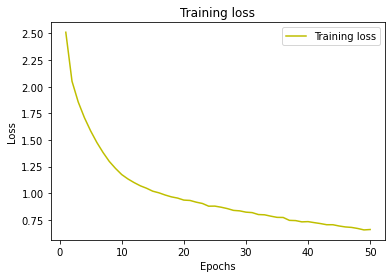

In [ ]:
##########################################################################

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
####################################################################
###################################
#Generate characters 
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)


In [ ]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)


In [ ]:
#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

In [ ]:
type(start_index)

int

In [ ]:
#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence


In [ ]:
print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)

----- Seed for our text prediction: "wn bear who teaches the wolf cubs the law of the jungle:
old"


In [ ]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

############################################

 kill koo-thant the stoon year. egraran elephant
this is i will
lef.” re had not
min of the ndrays place fast.

          their not clais, fathereng i!  a mong to killi-tuking his head clear on the stood stillnt where huntor scakeg his serven. for the
council knack was a mine--- ever mend of the never thee, seal where, but hea! mowgli bouboes obe groves. and the bandar’s came and each is skil-ton 
